In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

/home/alkire/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.12.0


In [2]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

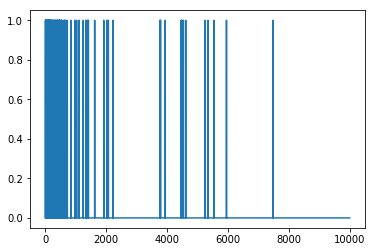

In [3]:
plt.plot(train_data[0])


In [4]:
baseline_model = keras.Sequential([
    # `input_shape` is only required here so that `.summary` works. 
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [5]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels)
                                     )

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 122us/step - loss: 0.4740 - acc: 0.8012 - binary_crossentropy: 0.4740 - val_loss: 0.3265 - val_acc: 0.8785 - val_binary_crossentropy: 0.3265
Epoch 2/20
25000/25000 [==============================] - 2s 91us/step - loss: 0.2414 - acc: 0.9117 - binary_crossentropy: 0.2414 - val_loss: 0.2835 - val_acc: 0.8874 - val_binary_crossentropy: 0.2835
Epoch 3/20
25000/25000 [==============================] - 2s 90us/step - loss: 0.1796 - acc: 0.9374 - binary_crossentropy: 0.1796 - val_loss: 0.2898 - val_acc: 0.8850 - val_binary_crossentropy: 0.2898
Epoch 4/20
25000/25000 [==============================] - 2s 90us/step - loss: 0.1447 - acc: 0.9508 - binary_crossentropy: 0.1447 - val_loss: 0.3151 - val_acc: 0.8793 - val_binary_crossentropy: 0.3151
Epoch 5/20
25000/25000 [==============================] - 2s 91us/step - loss: 0.1207 - acc: 0.9599 - binary_crossentropy: 0.1207 - val_loss: 0.3

In [4]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 40004     
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [5]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 3s - loss: 0.6456 - acc: 0.6330 - binary_crossentropy: 0.6456 - val_loss: 0.5993 - val_acc: 0.7562 - val_binary_crossentropy: 0.5993
Epoch 2/20
 - 2s - loss: 0.5511 - acc: 0.7816 - binary_crossentropy: 0.5511 - val_loss: 0.5368 - val_acc: 0.7836 - val_binary_crossentropy: 0.5368
Epoch 3/20
 - 2s - loss: 0.4915 - acc: 0.8433 - binary_crossentropy: 0.4915 - val_loss: 0.4962 - val_acc: 0.8471 - val_binary_crossentropy: 0.4962
Epoch 4/20
 - 2s - loss: 0.4492 - acc: 0.8805 - binary_crossentropy: 0.4492 - val_loss: 0.4693 - val_acc: 0.8567 - val_binary_crossentropy: 0.4693
Epoch 5/20
 - 2s - loss: 0.4162 - acc: 0.9028 - binary_crossentropy: 0.4162 - val_loss: 0.4530 - val_acc: 0.8579 - val_binary_crossentropy: 0.4530
Epoch 6/20
 - 2s - loss: 0.3892 - acc: 0.9180 - binary_crossentropy: 0.3892 - val_loss: 0.4365 - val_acc: 0.8737 - val_binary_crossentropy: 0.4365
Epoch 7/20
 - 2s - loss: 0.3666 - acc: 0.9282 - binary_crossentropy:

In [6]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [7]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 3s - loss: 0.3574 - acc: 0.8404 - binary_crossentropy: 0.3574 - val_loss: 0.2838 - val_acc: 0.8858 - val_binary_crossentropy: 0.2838
Epoch 2/20
 - 2s - loss: 0.1376 - acc: 0.9508 - binary_crossentropy: 0.1376 - val_loss: 0.3191 - val_acc: 0.8756 - val_binary_crossentropy: 0.3191
Epoch 3/20
 - 2s - loss: 0.0400 - acc: 0.9888 - binary_crossentropy: 0.0400 - val_loss: 0.4359 - val_acc: 0.8704 - val_binary_crossentropy: 0.4359
Epoch 4/20
 - 2s - loss: 0.0057 - acc: 0.9991 - binary_crossentropy: 0.0057 - val_loss: 0.5878 - val_acc: 0.8685 - val_binary_crossentropy: 0.5878
Epoch 5/20
 - 2s - loss: 0.0015 - acc: 1.0000 - binary_crossentropy: 0.0015 - val_loss: 0.6707 - val_acc: 0.8719 - val_binary_crossentropy: 0.6707
Epoch 6/20
 - 2s - loss: 2.1383e-04 - acc: 1.0000 - binary_crossentropy: 2.1383e-04 - val_loss: 0.7147 - val_acc: 0.8725 - val_binary_crossentropy: 0.7147
Epoch 7/20
 - 2s - loss: 1.2363e-04 - acc: 1.0000 - binary_c

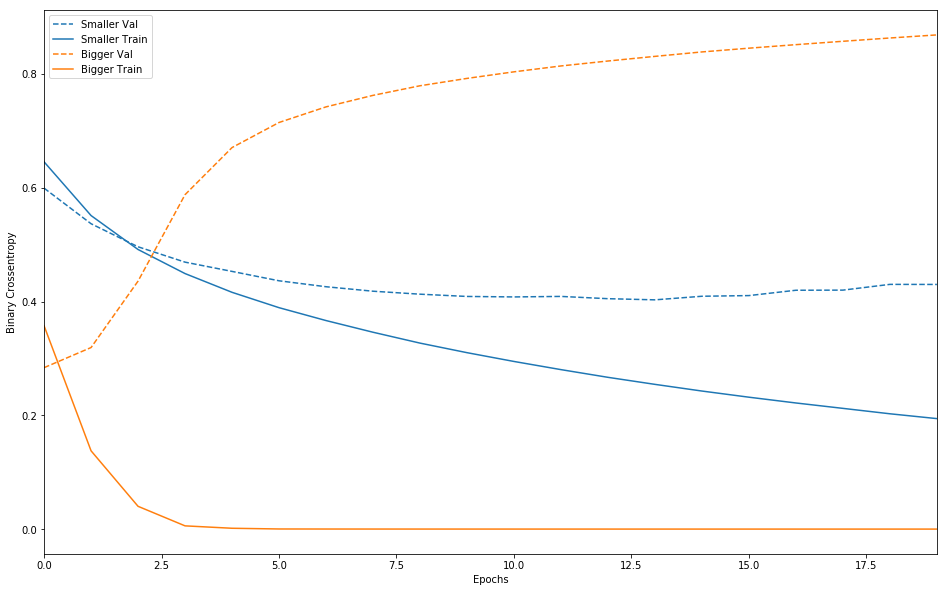

In [10]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))
    
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([#('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

In [11]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 2s - loss: 0.5265 - acc: 0.8078 - binary_crossentropy: 0.4841 - val_loss: 0.3785 - val_acc: 0.8794 - val_binary_crossentropy: 0.3339
Epoch 2/20
 - 2s - loss: 0.3020 - acc: 0.9087 - binary_crossentropy: 0.2534 - val_loss: 0.3358 - val_acc: 0.8885 - val_binary_crossentropy: 0.2844
Epoch 3/20
 - 2s - loss: 0.2510 - acc: 0.9315 - binary_crossentropy: 0.1973 - val_loss: 0.3414 - val_acc: 0.8844 - val_binary_crossentropy: 0.2861
Epoch 4/20
 - 2s - loss: 0.2301 - acc: 0.9407 - binary_crossentropy: 0.1734 - val_loss: 0.3563 - val_acc: 0.8811 - val_binary_crossentropy: 0.2985
Epoch 5/20
 - 2s - loss: 0.2173 - acc: 0.9467 - binary_crossentropy: 0.1580 - val_loss: 0.3642 - val_acc: 0.8796 - val_binary_crossentropy: 0.3042
Epoch 6/20
 - 2s - loss: 0.2044 - acc: 0.9528 - binary_crossentropy: 0.1438 - val_loss: 0.3793 - val_acc: 0.8738 - val_binary_crossentropy: 0.3182
Epoch 7/20
 - 2s - loss: 0.1958 - acc: 0.9562 - binary_crossentropy:

In [12]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 2s - loss: 0.6242 - acc: 0.6415 - binary_crossentropy: 0.6242 - val_loss: 0.4735 - val_acc: 0.8502 - val_binary_crossentropy: 0.4735
Epoch 2/20
 - 2s - loss: 0.4448 - acc: 0.8159 - binary_crossentropy: 0.4448 - val_loss: 0.3298 - val_acc: 0.8830 - val_binary_crossentropy: 0.3298
Epoch 3/20
 - 2s - loss: 0.3362 - acc: 0.8760 - binary_crossentropy: 0.3362 - val_loss: 0.2834 - val_acc: 0.8876 - val_binary_crossentropy: 0.2834
Epoch 4/20
 - 2s - loss: 0.2795 - acc: 0.9042 - binary_crossentropy: 0.2795 - val_loss: 0.2763 - val_acc: 0.8879 - val_binary_crossentropy: 0.2763
Epoch 5/20
 - 2s - loss: 0.2424 - acc: 0.9189 - binary_crossentropy: 0.2424 - val_loss: 0.2779 - val_acc: 0.8867 - val_binary_crossentropy: 0.2779
Epoch 6/20
 - 2s - loss: 0.2098 - acc: 0.9323 - binary_crossentropy: 0.2098 - val_loss: 0.2886 - val_acc: 0.8854 - val_binary_crossentropy: 0.2886
Epoch 7/20
 - 2s - loss: 0.1858 - acc: 0.9402 - binary_crossentropy: